In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

physical_devices = tf.config.list_physical_devices("GPU")
if len(physical_devices)>0:
  tf.config.experimental.set_memory_growth(physical_devices[0], True)

print(tf.__version__)

2.15.0


In [ ]:
# Pre-fetch the data for the Learn Module
!mkdir -p ~/.keras/datasets
!wget -P ~/.keras/datasets -q https://github.com/MicrosoftDocs/tensorflowfundamentals/raw/main/data/mnist.npz

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


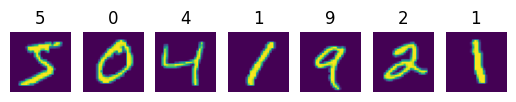

In [ ]:
fig, ax = plt.subplots(1, 7)
for i in range(7):
  ax[i].imshow(x_train[i])
  ax[i].set_title(y_train[i])
  ax[i].axis("off")

In [ ]:
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(10, activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.layers[1].weights

[<tf.Variable 'dense/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[-0.05163403, -0.02588646, -0.04210329, ..., -0.03314554,
         -0.06152286,  0.01339171],
        [ 0.02492744,  0.02561351, -0.02019078, ..., -0.06449223,
         -0.01573548, -0.04094416],
        [-0.04160203,  0.0816434 , -0.00586049, ...,  0.02770262,
          0.03843162,  0.05475388],
        ...,
        [ 0.08607697,  0.0380512 ,  0.05778911, ..., -0.00476811,
          0.08673742, -0.07671771],
        [ 0.05280734,  0.03854377, -0.06368389, ..., -0.05873948,
          0.0459427 ,  0.05827092],
        [-0.01896284,  0.01917017,  0.00964902, ..., -0.02501622,
         -0.03808004,  0.07640231]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

# Training The Network

### We have created the model, but we have not yet trained the model on any data

In [ ]:
print("Digit to be predicted: ", y_train[0])
model(np.expand_dims(x_train[0], 0))

Digit to be predicted:  5


<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[0.08611666, 0.08872604, 0.10289952, 0.21253459, 0.10342531,
        0.02921288, 0.08599877, 0.0758623 , 0.04049611, 0.17472781]],
      dtype=float32)>

### Let's add an optimizer and a loss function to our model

In [ ]:
model.compile(optimizer="sgd", loss="categorical_crossentropy")

### Let's one-hot encode our training data so that our output data is also in one-hot encoded format

In [ ]:
y_train_onehot = keras.utils.to_categorical(y_train)
y_test_onehot = keras.utils.to_categorical(y_test)
print("First three training labels are: ", y_train[:3])
print("One hot encoded version are: \n", y_train_onehot[:3])

First three training labels are:  [5 0 4]
One hot encoded version are: 
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


### Now to do the actual training, we call the fit function

In [ ]:
model.fit(x_train, y_train_onehot)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.7788


### Let's increase the number of epochs and also add validation data
- The fit function returns the history object that contains the loss data for each training epoch. It can be used to visualize the loss on the graph:

In [ ]:
hist = model.fit(x_train, y_train_onehot, validation_data = (x_test, y_test_onehot), epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4559 - val_loss: 0.3999
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4031 - val_loss: 0.3665
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3767 - val_loss: 0.3471


### Let's visualize what the loss function is looking like

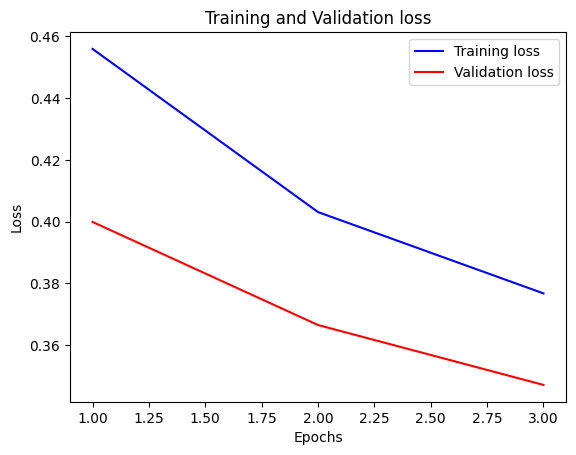

In [ ]:
train_loss = hist.history["loss"]
val_loss = hist.history["val_loss"]
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'b', label = "Training loss")
plt.plot(epochs, val_loss, 'r', label = "Validation loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()

plt.show()

### In order to gain more information about our model performance let's have a look at it's accuracy. For that we have to add accuracy as one of the metric.

In [ ]:
model.compile(optimizer="sgd", loss = 'categorical_crossentropy', metrics = ['acc'])
hist = model.fit(x_train, y_train_onehot, validation_data = (x_test, y_test_onehot), epochs = 3, batch_size = 128)

Epoch 1/3
469/469 [==============================] - 3s 5ms/step - loss: 0.3643 - acc: 0.8991 - val_loss: 0.3435 - val_acc: 0.9064
Epoch 2/3
469/469 [==============================] - 2s 3ms/step - loss: 0.3605 - acc: 0.9003 - val_loss: 0.3404 - val_acc: 0.9066
Epoch 3/3
469/469 [==============================] - 2s 3ms/step - loss: 0.3571 - acc: 0.9010 - val_loss: 0.3376 - val_acc: 0.9076


- The reason why we used **batch_size** in the above model is because it helps our model learn better by feeding it the input data in smaller number

### Now let's try a different optimizer in order to improve our model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation="softmax")])
model.compile(optimizer=keras.optimizers.SGD(momentum=0.5), loss="categorical_crossentropy", metrics="acc")
hist = model.fit(x_train, y_train_onehot, validation_data = (x_test, y_test_onehot), epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.7824 - acc: 0.8154 - val_loss: 0.4797 - val_acc: 0.8792
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4558 - acc: 0.8809 - val_loss: 0.4010 - val_acc: 0.8940
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.4033 - acc: 0.8905 - val_loss: 0.3670 - val_acc: 0.9009
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3769 - acc: 0.8967 - val_loss: 0.3486 - val_acc: 0.9061
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3601 - acc: 0.9007 - val_loss: 0.3369 - val_acc: 0.9083


### Now let's try to visualize what the accuracy is looking like

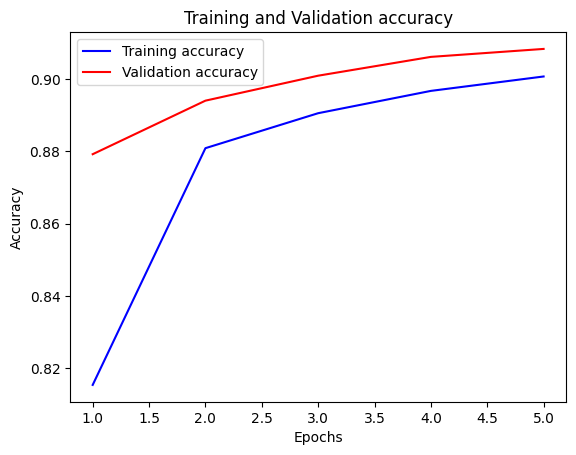

In [ ]:
train_acc = hist.history["acc"]
val_acc = hist.history["val_acc"]
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label = "Training accuracy")
plt.plot(epochs, val_acc, 'r', label = "Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Visualizing the Network weights
- Since our network only has one layer, it makes sense to look at the weight.

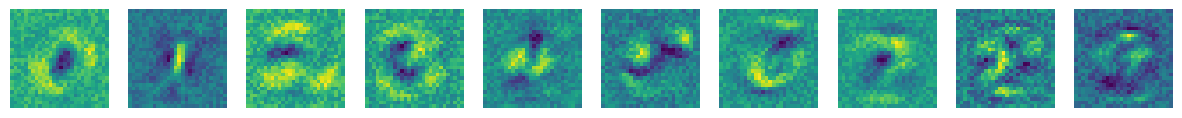

In [ ]:
weight_tensor = model.layers[1].weights[0].numpy().reshape(28,28,10)
fig,ax = plt.subplots(1,10,figsize=(15,4))
for i in range(10):
    ax[i].imshow(weight_tensor[:,:,i])
    ax[i].axis('off')

### Multilayer perceptron

We are going to try implementing non-linear activation function now, so let's try to visualize what those non-linear activation function look like.

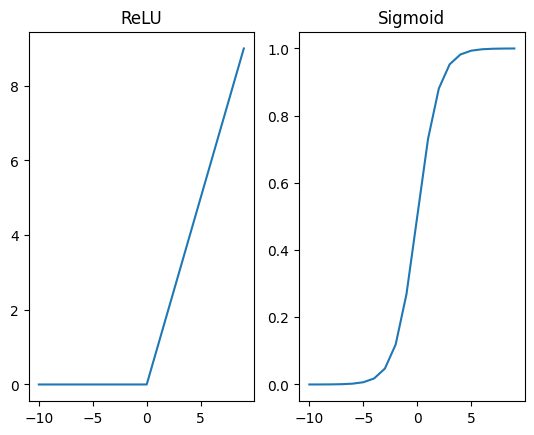

In [ ]:
def plot_function(f, name=""):
  plt.plot(range(-10,10), [f(tf.constant(x, dtype=tf.float32)) for x in range(-10, 10)])
  plt.title(name)

plt.subplot(121)
plot_function(tf.nn.relu, "ReLU")
plt.subplot(122)
plot_function(tf.nn.sigmoid, "Sigmoid")

### Now let's add more layers to our model and also define it in a different way

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100))
model.add(keras.layers.ReLU())
model.add(keras.layers.Dense(10))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 re_lu (ReLU)                (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### We have changed the loss function to one which actually expects the input to have number of classes, instead of the corresponding one-hot vector.

In [ ]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["acc"])

In [ ]:
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2694 - acc: 0.9237 - val_loss: 0.1466 - val_acc: 0.9568
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1283 - acc: 0.9623 - val_loss: 0.1138 - val_acc: 0.9651
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0947 - acc: 0.9724 - val_loss: 0.1150 - val_acc: 0.9678
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0768 - acc: 0.9778 - val_loss: 0.0960 - val_acc: 0.9738
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0651 - acc: 0.9807 - val_loss: 0.1027 - val_acc: 0.9720


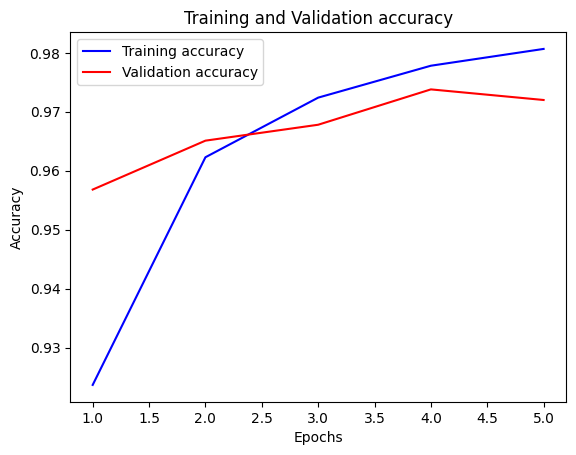

In [ ]:
train_acc = hist.history["acc"]
val_acc = hist.history["val_acc"]
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label = "Training accuracy")
plt.plot(epochs, val_acc, 'r', label = "Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### After a certain point the validation accuracy will not improve any more, but if we still keep training the mode our model will be overfitted.

### To make the model definition shorted we can set the activation function right inside the dense layer

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation=None))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Convolutional Neural Network
- These are small windows that run over each pixel of the image and compute the weighted average of the neighbouring pixels
- The architecture of Convolutional Neural Network uses many of the working principles of the animal visual system & it has been able to achieve extraordinary results in image-related learning tasks.

### Let's start by applying 2 different convolutional filters over our dataset.


In [ ]:
!pip install tfcv

In [ ]:
# Pre-fetch the data when running in sandbox environment
!mkdir -p ~/.keras/datasets
!wget -P ~/.keras/datasets -q https://github.com/MicrosoftDocs/tensorflowfundamentals/raw/main/data/mnist.npz
# Load tfcv.py module
!wget -O tfcv.py -q https://github.com/MicrosoftDocs/tensorflowfundamentals/raw/main/computer-vision-tf/tfcv.py

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 9, kernel_size=(5, 5), input_shape=(28,28,1), activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["acc"])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 9)         234       
                                                                 
 flatten_4 (Flatten)         (None, 5184)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                51850     
                                                                 
Total params: 52084 (203.45 KB)
Trainable params: 52084 (203.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### We need to reshape our data before we train our model.

In [ ]:
x_train_c = np.expand_dims(x_train, 3)
x_test_c = np.expand_dims(x_test, 3)
hist = model.fit(x_train_c, y_train, validation_data = (x_test_c, y_test), epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1953 - acc: 0.9438 - val_loss: 0.0862 - val_acc: 0.9745
Epoch 2/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0834 - acc: 0.9759 - val_loss: 0.0671 - val_acc: 0.9801
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0642 - acc: 0.9812 - val_loss: 0.0635 - val_acc: 0.9806


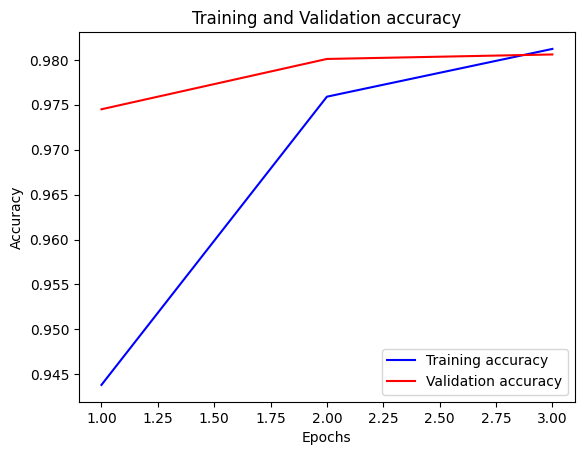

In [ ]:
train_acc = hist.history["acc"]
val_acc = hist.history["val_acc"]
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label = "Training accuracy")
plt.plot(epochs, val_acc, 'r', label = "Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### We are able to achieve higher accuracy with lower epochs, but the training itself required more resources.

### Let's try to visualize the weights of our cnn layers to make more sense of what's going on.

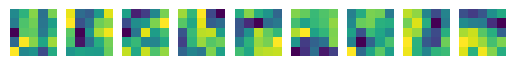

In [ ]:
fig,ax = plt.subplots(1,9)
l = model.layers[0].weights[0]
for i in range(9):
    ax[i].imshow(l[...,0,i])
    ax[i].axis('off')

### Well some of those filters look like they can recogonize some oblique stroke while others look pretty random.

## Multilayered CNN's and Pooling layers
- The first convolutional layer look for primitive patters, the next one on top of it looks for high level patters.
- Then further convolutional layers combine those shapes into some part of the picture.
- Once we have determined that there is a horizontal stroke within sliding 3x3 window, it is not so important at which exact pixel it occured. Thus we can scale down the size of the image using pooling layers.

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=10, kernel_size=(5,5), input_shape=(28,28,1), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(filters=20, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        260       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 10)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 20)          5020      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 20)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 320)               0         
                                                                 
 dense_7 (Dense)             (None, 10)               

In [ ]:
hist = model.fit(x_train_c, y_train, validation_data=(x_test_c, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2173 - acc: 0.9349 - val_loss: 0.0700 - val_acc: 0.9781
Epoch 2/3
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0769 - acc: 0.9766 - val_loss: 0.0499 - val_acc: 0.9842
Epoch 3/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0570 - acc: 0.9826 - val_loss: 0.0485 - val_acc: 0.9837


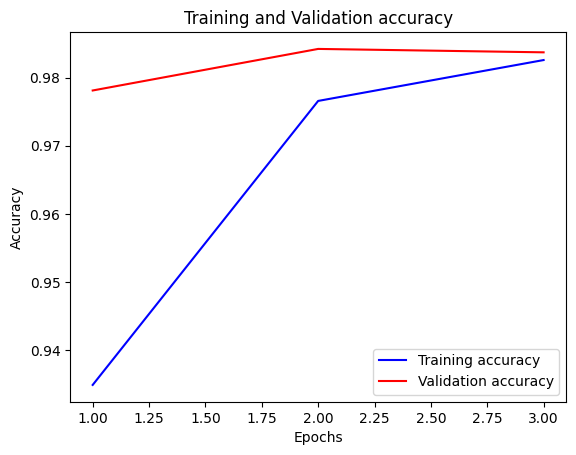

In [ ]:
train_acc = hist.history["acc"]
val_acc = hist.history["val_acc"]
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label = "Training accuracy")
plt.plot(epochs, val_acc, 'r', label = "Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Well, we got even better results and with even lesser input size, so that means that a more complicated network requires lesses input data but takes more computing power.

# Now it's time to actually do something challenging
### Playing with real images
- Our Dataset has 60k images 32x32 divided into 10 classes.

### Let's first get our dataset ready

In [ ]:
# Let's first get our dataset
!wget -P ~/.keras/datasets -q https://mslearntensorflowlp.blob.core.windows.net/data/cifar-10-batches-py.tar.gz

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

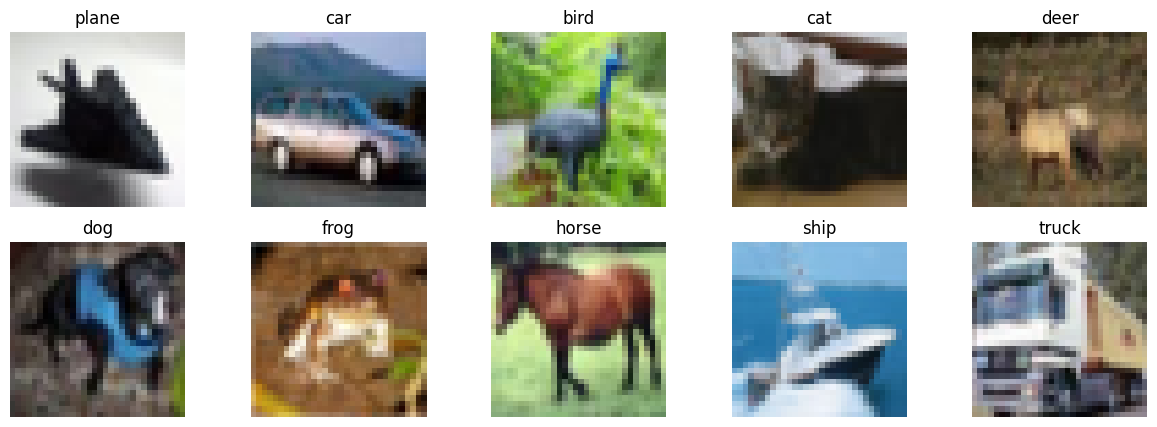

In [ ]:
num_classes = len(classes)

plt.figure(figsize=(15, 5))

for i in range(num_classes):
    # Find the index of the first image in the training set with the current class label
    index = np.where(y_train == i)[0][0]

    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[index])
    plt.title(classes[i])
    plt.axis('off')

plt.show()

### Now let's define the model that will help us classify these images
- We are going to use the LeNet architecutre, it has a total of 7 layers

In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters = 6, kernel_size = 5, strides = 1, activation = 'relu', input_shape = (32,32,3)),
    keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
    keras.layers.Conv2D(filters = 16, kernel_size = 5, strides = 1, activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = 2, strides = 2),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation = 'relu'),
    keras.layers.Dense(84, activation = 'relu'),
    keras.layers.Dense(10, activation = 'softmax')])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 6)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 400)               0         
                                                                 
 dense_8 (Dense)             (None, 120)              

## Training this model is going to take a toll on your CPU, so let's switch to a GPU

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 10s 5ms/step - loss: 1.6276 - acc: 0.4038 - val_loss: 1.4107 - val_acc: 0.4926
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3330 - acc: 0.5248 - val_loss: 1.2971 - val_acc: 0.5346
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2175 - acc: 0.5672 - val_loss: 1.2385 - val_acc: 0.5569
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1413 - acc: 0.5955 - val_loss: 1.1985 - val_acc: 0.5786
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0764 - acc: 0.6189 - val_loss: 1.1673 - val_acc: 0.5965
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0243 - acc: 0.6394 - val_loss: 1.1557 - val_acc: 0.5936
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9795 - acc: 0.6555 - val_loss: 1.1251 - val_acc: 0.6081
Epoch 8/10
1563/1563 [==============================] - 8s 5m

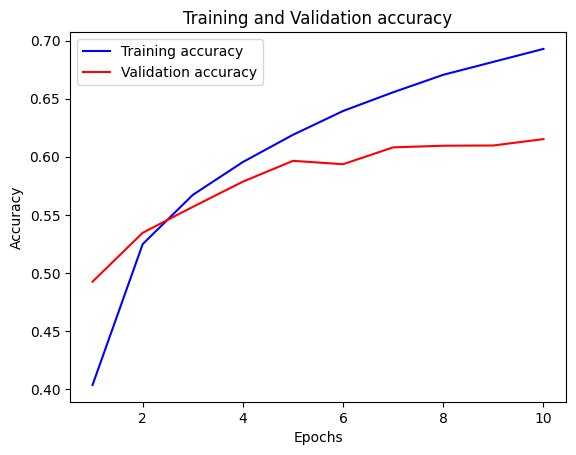

In [ ]:
train_acc = hist.history["acc"]
val_acc = hist.history["val_acc"]
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label = "Training accuracy")
plt.plot(epochs, val_acc, 'r', label = "Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel('Accuracy')
plt.legend()

plt.show()

313/313 [==============================] - 1s 2ms/step


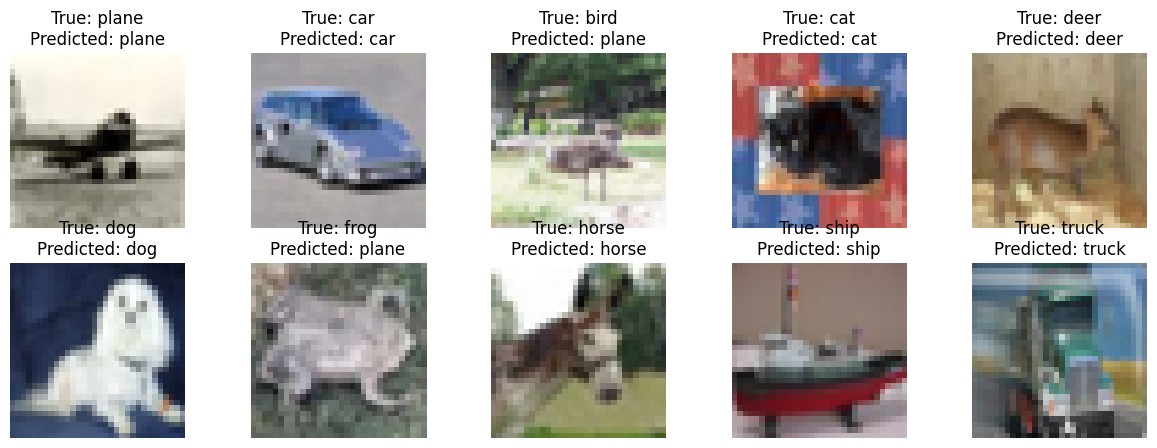

In [ ]:
predictions = model.predict(x_test)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

plt.figure(figsize=(15, 5))

for i in range(len(classes)):
    class_indices = np.where(y_test == i)[0]

    random_index = np.random.choice(class_indices)

    predicted_class = np.argmax(predictions[random_index])

    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[random_index])
    plt.title(f'True: {classes[i]}\nPredicted: {classes[predicted_class]}')
    plt.axis('off')

plt.show()

# Pre-trained models and transfer learning
- Training a CNN take a lot of time especially when you have to find the best low-level filters to extract pattern from the images.
- Can we use a NN trained on one dataset and adapt it to classifying different images withotu fully training it?
- This concept is called transfer learning, we typically use a pre-trained model which have been trained on large dataset such as **ImageNet**.
- Those models are typically good at extracting features from an image and we just have to build the classifier on top of it.

### Cats vs Dogs Dataset

### Loading the Dataset

In [ ]:
if not os.path.exists('data/kagglecatsanddogs_5340.zip'):
  !mkdir -p data
  !wget -p data -q https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

In [ ]:
import zipfile
if not os.path.exists('data/PetImages'):
    with zipfile.ZipFile('/content/download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip', 'r') as zip_ref:
        zip_ref.extractall('data')

### Unfortunately some of our images are corrupted so let's fix them.

In [ ]:
from PIL import Image
import os

def is_image_corrupted(image_path):
    try:
        img = Image.open(image_path)
        img.verify()  # Try to open and verify the image
        return False   # Image is not corrupted
    except (IOError, SyntaxError) as e:
        print(f"Corrupted image: {image_path}")
        return True    # Image is corrupted

def clean_dataset(dataset_path):
    # Iterate over all files in the dataset path
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            # Construct the full path to the image file
            image_path = os.path.join(root, file)

            # Check if the image is corrupted
            if is_image_corrupted(image_path):
                # If corrupted, remove the file
                os.remove(image_path)
                print(f"Removed: {image_path}")

# Function that takes dataset_path as an argument
def clean_corrupt_images(dataset_path):
    print(f"Cleaning corrupt images in dataset: {dataset_path}")
    clean_dataset(dataset_path)

clean_corrupt_images("/content/data/PetImages/Cat")
clean_corrupt_images("/content/data/PetImages/Dog")

Cleaning corrupt images in dataset: /content/data/PetImages/Cat
Cleaning corrupt images in dataset: /content/data/PetImages/Dog


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


### Let's load the dataset
- We still won't be able to remove all the corrupted image but anyways let's proceed.

In [ ]:
data_dir = 'data/PetImages'
batch_size = 32
ds_train = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 13,
    image_size = (224, 224),
    batch_size = batch_size
)
ds_test = keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = 'validation',
    seed = 13,
    image_size = (224, 224),
    batch_size = batch_size
)

Found 24998 files belonging to 2 classes.
Using 19999 files for training.
Found 24998 files belonging to 2 classes.
Using 4999 files for validation.


In [ ]:
for x,y in ds_train:
  print("Training batch shape: features=", x.shape, "labels=", y.shape)
  x_sample, y_sample = x,y
  break

Training batch shape: features= (32, 224, 224, 3) labels= (32,)


### Pre-trained models
- Let's load the simplest pre-trained model for image classification that is VGG-16

In [ ]:
# Download the model weights
!mkdir -p ~/.keras/models
!wget -P ~/.keras/models -q https://mslearntensorflowlp.blob.core.windows.net/models/vgg16_weights_tf_dim_ordering_tf_kernels.h5
!wget -P ~/.keras/models -q https://mslearntensorflowlp.blob.core.windows.net/models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
!wget -P ~/.keras/models -q https://mslearntensorflowlp.blob.core.windows.net/models/imagenet_class_index.json

In [ ]:
vgg = tf.keras.applications.VGG16()

553467096/553467096 [==============================] - 10s 0us/step


In [ ]:
inp = keras.applications.vgg16.preprocess_input(x_sample[:1])

res = vgg(inp)
print("Most probably class: ", tf.argmax(res,1))

keras.applications.vgg16.decode_predictions(res.numpy())

Most probably class:  tf.Tensor([287], shape=(1,), dtype=int64)
35363/35363 [==============================] - 0s 0us/step


[[('n02127052', 'lynx', 0.18114312),
  ('n02328150', 'Angora', 0.11107325),
  ('n02124075', 'Egyptian_cat', 0.08120513),
  ('n03887697', 'paper_towel', 0.078363605),
  ('n02110185', 'Siberian_husky', 0.062664464)]]

In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

### Let's check if tensorflow is actually using GPU or not

In [ ]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### Lets use the VGG model to extract features from our image and not do any classification.

Shape after applying VGG-16:  (7, 7, 512)


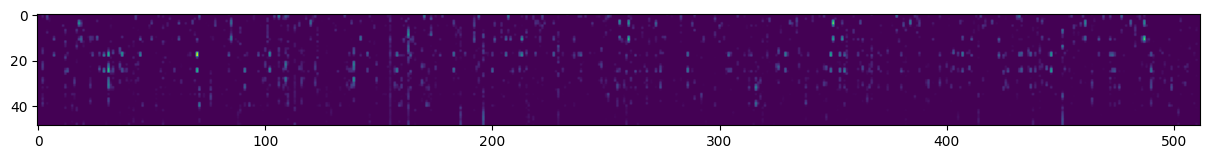

In [ ]:
vgg = keras.applications.VGG16(include_top=False)

inp = keras.applications.vgg16.preprocess_input(x_sample[:1])
res = vgg(inp)
print("Shape after applying VGG-16: ", res[0].shape)
plt.figure(figsize=(15,3))
plt.imshow(res[0].numpy().reshape(-1,512))

### Now lets create a new dataset which contains the VGG extracted features instead of original images.

In [ ]:
num = batch_size*25
ds_features_train = ds_train.take(25).map(lambda x,y : (vgg(x), y))
ds_features_test = ds_test.take(10).map(lambda x,y : (vgg(x),y))

for x,y in ds_features_train:
  print(x.shape, y.shape)
  break

(32, 7, 7, 512) (32,)


### Now lets create the actual model

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(7,7,512)),
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
hist = model.fit(ds_features_train, validation_data = ds_features_test)

25/25 [==============================] - 544s 22s/step - loss: 2.1176 - acc: 0.8788 - val_loss: 1.0113 - val_acc: 0.9406
